In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import string
import nltk
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


In [2]:
data = pd.read_json("S:/!FILE KULIAH/Tugas Analisis Medsos/UTS_AnalisisMedsos/data/datasetKekerasanFisik.json")
print('jumlah dataset = ', len(data))

data.head()

jumlah dataset =  97


,author_id,created_at,edit_history_tweet_ids,id,text,labelPelaku,labelKorban
0,1413898417982500864,2022-11-21 13:00:04+00:00,[1594677022458253312],1594677022458253312,Bullying itu perlakuan biadab. Apalagi sampai ...,Negatif,Netral
1,4793936352,2022-11-21 12:47:29+00:00,[1594673856446230528],1594673856446230528,"@Khoirul75477760 mudah aja komen ini itu, mema...",Negatif,Positif
2,130754437,2022-11-21 12:20:41+00:00,[1594667111204282370],1594667111204282368,Kenapa sih kemaren happening berita polisi amp...,Negatif,Netral
3,1100305795,2022-11-21 12:03:06+00:00,[1594662686981513218],1594662686981513216,"TAFSIR-SOSIAL-SUFI–\nDalam bahasa hukum, mengg...",Netral,Netral
4,143741404,2022-11-21 08:09:15+00:00,[1594603836467183619],1594603836467183616,@BennyHarmanID Biasanya mereka yang suka berma...,Negatif,Netral


[ 3 83 11]


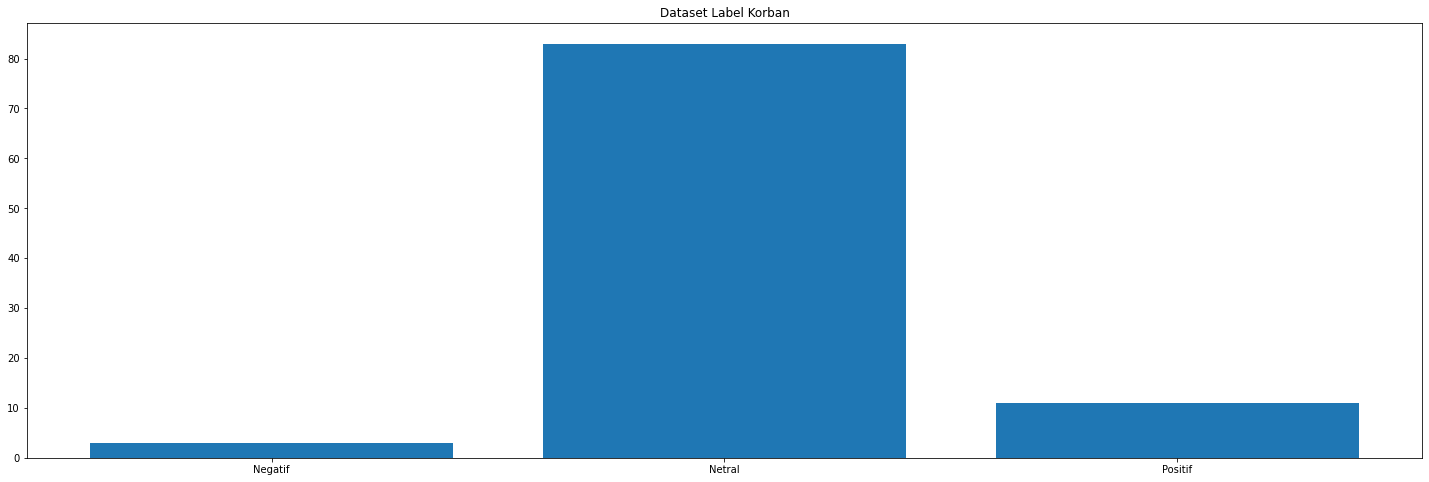

[39 56  2]


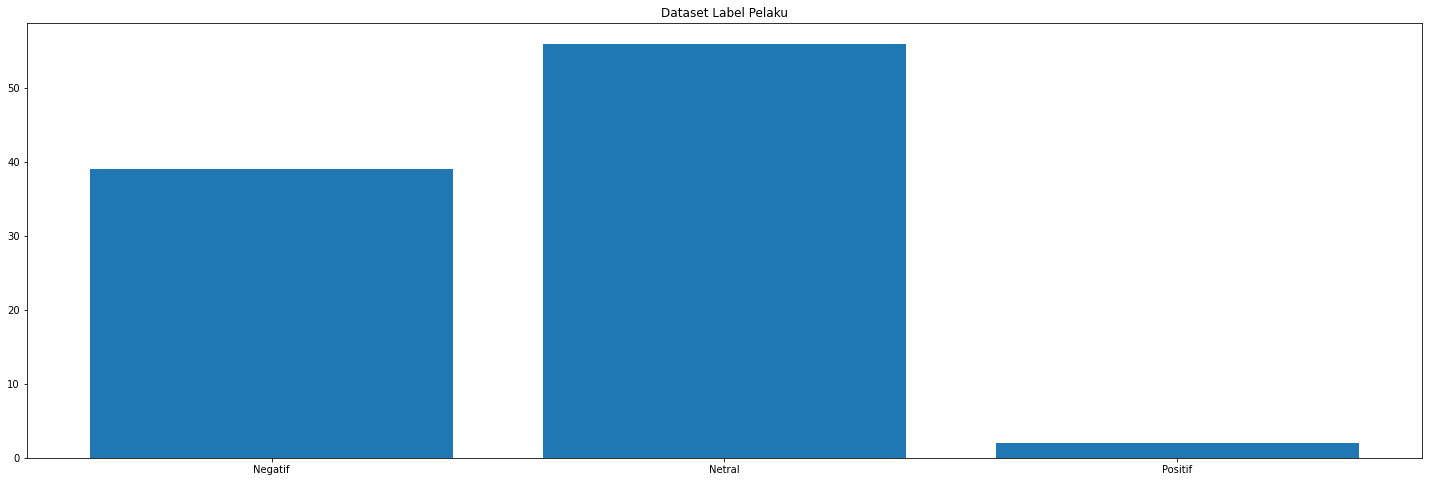

In [3]:
# First let's visualize the distribution of categories in the dataset
categories, ccount = np.unique(data['labelKorban'], return_counts=True)
print(ccount)
# Using a figsize this big seems dirty. It's the only way I figured to make
# the x labels not overlap. I suck at plotting, sorry
plt.figure(figsize=(25, 8))
plt.title("Dataset Label Korban")
plt.bar(categories, ccount, align='center')
plt.show()

# First let's visualize the distribution of categories in the dataset
categories, ccount = np.unique(data['labelPelaku'], return_counts=True)
print(ccount)
# Using a figsize this big seems dirty. It's the only way I figured to make
# the x labels not overlap. I suck at plotting, sorry
plt.figure(figsize=(25, 8))
plt.title("Dataset Label Pelaku")
plt.bar(categories, ccount, align='center')
plt.show()

In [4]:
labelP = []
labelK = []
for index, row in data.iterrows():
    if row["labelPelaku"] ==  'Positif':
        labelP.append(1)
    elif row["labelPelaku"] ==  'Negatif':
        labelP.append(0)
    else:
        labelP.append(2)   
        
    if row["labelKorban"] ==  'Positif':
        labelK.append(1)
    elif row["labelKorban"] ==  'Negatif':
        labelK.append(0)
    else:
        labelK.append(2)   

data["labelPelaku"] = labelP
data["labelKorban"] = labelK

data

,author_id,created_at,edit_history_tweet_ids,id,text,labelPelaku,labelKorban
0,1413898417982500864,2022-11-21 13:00:04+00:00,[1594677022458253312],1594677022458253312,Bullying itu perlakuan biadab. Apalagi sampai ...,0,2
1,4793936352,2022-11-21 12:47:29+00:00,[1594673856446230528],1594673856446230528,"@Khoirul75477760 mudah aja komen ini itu, mema...",0,1
2,130754437,2022-11-21 12:20:41+00:00,[1594667111204282370],1594667111204282368,Kenapa sih kemaren happening berita polisi amp...,0,2
3,1100305795,2022-11-21 12:03:06+00:00,[1594662686981513218],1594662686981513216,"TAFSIR-SOSIAL-SUFI–\nDalam bahasa hukum, mengg...",2,2
4,143741404,2022-11-21 08:09:15+00:00,[1594603836467183619],1594603836467183616,@BennyHarmanID Biasanya mereka yang suka berma...,0,2
...,...,...,...,...,...,...,...
92,354873411,2022-11-19 16:18:41+00:00,[1594002231237279744],1594002231237279744,@AREAJULID kekerasan fisik dan psikis kepada k...,0,2
93,1304680041914101760,2022-11-19 16:12:34+00:00,[1594000689440571392],1594000689440571392,@tanyarlfes dan itu nurun ke adek gua karna di...,0,2
94,1520962599478722560,2022-11-19 15:52:28+00:00,[1593995630862798849],1593995630862798848,kayaknya emang udah saatnya Indonesia punya pe...,2,2
95,1520962599478722560,2022-11-19 15:52:27+00:00,[1593995626651406336],1593995626651406336,gue bingung sama sekolah yang pakai cara dama...,0,2


In [5]:
normal = pd.read_excel("S:/!FILE KULIAH/Tugas Analisis Medsos/UTS_AnalisisMedsos/normal.xlsx")
normal.head()
awal = normal['Awal'].tolist()
akhir = normal['Asli'].tolist()

In [6]:
konten = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for i in range(len(data['text'])):
    w = []
    print("Prepocessing Data ", i+1, " / ",len(data['text']))
    tokenUnique = []
    #CASE FOLDING
    lower = data['text'][i].lower()
    #STEMMING
    stem = stemmer.stem(lower)
    #TOKENIZING
    hapusAngka = re.sub(r"\d+", "", stem)
    hapusTandaBaca = hapusAngka.translate(str.maketrans("", "", string.punctuation))
    hapusSpasi = hapusTandaBaca.strip()
    for q in hapusSpasi.split():
        if q in awal:
            w.append(akhir[awal.index(q)])
        else:
            w.append(q)
    konten.append(" ".join(map(str,w)))
data['text'] = konten    

Prepocessing Data  1  /  97
Prepocessing Data  2  /  97
Prepocessing Data  3  /  97
Prepocessing Data  4  /  97
Prepocessing Data  5  /  97
Prepocessing Data  6  /  97
Prepocessing Data  7  /  97
Prepocessing Data  8  /  97
Prepocessing Data  9  /  97
Prepocessing Data  10  /  97
Prepocessing Data  11  /  97
Prepocessing Data  12  /  97
Prepocessing Data  13  /  97
Prepocessing Data  14  /  97
Prepocessing Data  15  /  97
Prepocessing Data  16  /  97
Prepocessing Data  17  /  97
Prepocessing Data  18  /  97
Prepocessing Data  19  /  97
Prepocessing Data  20  /  97
Prepocessing Data  21  /  97
Prepocessing Data  22  /  97
Prepocessing Data  23  /  97
Prepocessing Data  24  /  97
Prepocessing Data  25  /  97
Prepocessing Data  26  /  97
Prepocessing Data  27  /  97
Prepocessing Data  28  /  97
Prepocessing Data  29  /  97
Prepocessing Data  30  /  97
Prepocessing Data  31  /  97
Prepocessing Data  32  /  97
Prepocessing Data  33  /  97
Prepocessing Data  34  /  97
Prepocessing Data  35  

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [8]:
cv = CountVectorizer()
term_fit = cv.fit(data['text'])

print (len(term_fit.vocabulary_))

977


In [9]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'bullying': 160,
 'itu': 365,
 'laku': 479,
 'biadab': 135,
 'apalagi': 59,
 'sampai': 777,
 'keras': 439,
 'fisik': 267,
 'jangan': 372,
 'hanya': 321,
 'karena': 404,
 'mereka': 565,
 'para': 676,
 'adalah': 4,
 'anak': 45,
 'terus': 895,
 'cuma': 186,
 'kasih': 407,
 'tindak': 903,
 'tegur': 880,
 'harus': 324,
 'hukum': 342,
 'timpal': 901,
 'khoirul': 444,
 'mudah': 582,
 'aja': 17,
 'komen': 450,
 'ini': 354,
 'memang': 554,
 'ngga': 625,
 'benar': 117,
 'di': 207,
 'butuh': 164,
 'sabar': 767,
 'yang': 970,
 'extra': 260,
 'besar': 133,
 'untuk': 939,
 'terima': 892,
 'uji': 932,
 'kenapa': 435,
 'sih': 825,
 'kemaren': 427,
 'terjadi': 893,
 'berita': 131,
 'polisi': 712,
 'ampir': 43,
 'bulan': 157,
 'sekarang': 794,
 'mana': 527,
 'pada': 662,
 'anjing': 55,
 'banget': 95,
 'kaya': 412,
 'gapunya': 283,
 'adab': 3,
 'semua': 805,
 'bikin': 138,
 'parno': 678,
 'masyarakat': 539,
 'tafsirsosialsufi': 861,
 'dalam': 190,
 'bahasa': 84,
 'goda': 300,
 'ayat': 74,
 'atas': 68,
 

In [10]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(data['text'])
print (term_frequency_all)

  (0, 4)	1
  (0, 45)	1
  (0, 59)	1
  (0, 135)	1
  (0, 160)	1
  (0, 186)	1
  (0, 267)	1
  (0, 321)	1
  (0, 324)	1
  (0, 342)	1
  (0, 365)	1
  (0, 372)	1
  (0, 404)	1
  (0, 407)	1
  (0, 439)	1
  (0, 479)	4
  (0, 565)	1
  (0, 676)	1
  (0, 777)	1
  (0, 880)	1
  (0, 895)	1
  (0, 901)	1
  (0, 903)	1
  (1, 17)	1
  (1, 117)	2
  :	:
  (96, 306)	1
  (96, 324)	1
  (96, 332)	1
  (96, 341)	1
  (96, 365)	1
  (96, 369)	2
  (96, 381)	1
  (96, 384)	1
  (96, 399)	2
  (96, 421)	1
  (96, 432)	1
  (96, 439)	1
  (96, 441)	1
  (96, 445)	2
  (96, 482)	1
  (96, 497)	1
  (96, 532)	3
  (96, 555)	1
  (96, 761)	1
  (96, 781)	3
  (96, 818)	1
  (96, 820)	2
  (96, 825)	1
  (96, 831)	1
  (96, 970)	1


In [11]:
dokumen = term_fit.transform(data['text']) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

[4.8918203  4.8918203  2.54044504 4.48635519 3.97552957 4.8918203
 4.8918203  4.19867312 4.8918203  4.8918203  4.8918203  4.8918203
 4.8918203  4.8918203  4.8918203  4.8918203  4.48635519 2.58923521
 3.97552957 4.8918203  3.63905733 4.48635519 3.97552957 4.8918203
 4.8918203  4.8918203  4.8918203  3.50552594 4.8918203  4.8918203
 4.48635519 4.8918203  4.19867312 4.8918203  4.8918203  4.8918203
 4.8918203  4.8918203  4.8918203  4.8918203  4.8918203  4.8918203
 4.8918203  4.8918203  4.8918203  2.21767165 4.8918203  4.8918203
 4.8918203  4.8918203  4.8918203  4.19867312 4.8918203  4.48635519
 4.8918203  4.48635519 4.8918203  3.3877429  4.19867312 3.50552594
 4.8918203  4.48635519 3.97552957 4.8918203  3.97552957 4.19867312
 4.8918203  4.8918203  4.48635519 2.81237876 4.8918203  4.8918203
 4.8918203  4.8918203  4.8918203  4.48635519 4.8918203  4.8918203
 3.97552957 4.19867312 4.48635519 4.8918203  4.8918203  4.8918203
 4.8918203  3.79320801 4.8918203  3.28238239 4.48635519 4.8918203
 4.891

In [12]:
data_label = data[["text", "labelPelaku", "labelKorban"]]

In [13]:
data_label.to_excel("data_label.xlsx")

In [14]:
from wordcloud import WordCloud

In [15]:
train_s0P = data_label[data_label["labelPelaku"] == 0]
train_s0K = data_label[data_label["labelKorban"] == 0]

In [16]:
train_s0P

,text,labelPelaku,labelKorban
0,bullying itu laku biadab apalagi sampai laku k...,0,2
1,khoirul mudah aja komen ini itu memang ngga be...,0,1
2,kenapa sih kemaren terjadi berita polisi ampir...,0,2
4,bennyharmanid biasa mereka yang suka main kera...,0,2
5,puspsningrum irwanyah kemdikbud ri kemensetneg...,0,2
10,rokusrakus abankbakso kegblgnunfaedh bahkan ga...,0,2
11,convomfs gaada alasan apa untuk wajar keras fi...,0,2
12,convomfs bodoh banget tukang bully kek gatau a...,0,2
14,gampang itu kah rundung orang jadiin orang lai...,0,2
15,putrifatekha kompastv karna dulu saya ngga han...,0,2


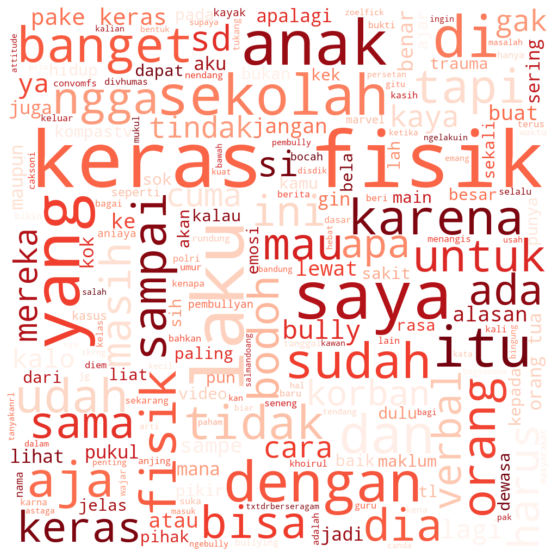

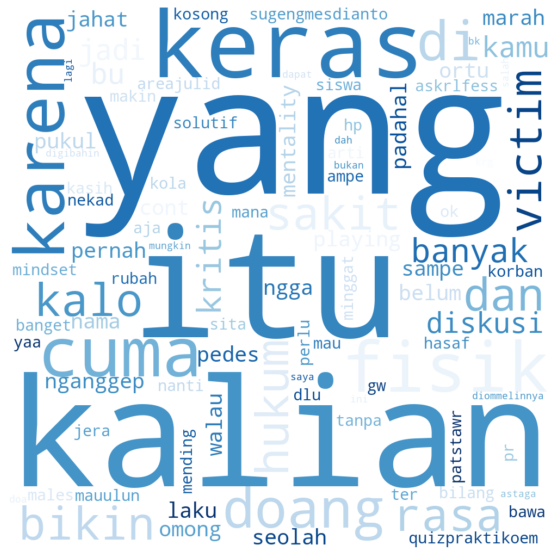

In [17]:
all_text_s0P = ' '.join(word for word in train_s0P["text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0P)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

all_text_s0K = ' '.join(word for word in train_s0K["text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0K)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [18]:
train_s1P = data_label[data_label["labelPelaku"] == 1]
train_s1K = data_label[data_label["labelKorban"] == 1]

In [19]:
train_s1K

,text,labelPelaku,labelKorban
1,khoirul mudah aja komen ini itu memang ngga be...,0,1
7,askrlfess kalo nyakitin mah nyakitin aja mo it...,2,1
8,askrlfess apa yang kamu rasain valid kok nder ...,2,1
13,nurwant sultan jelata kompastv nder kamu bilan...,2,1
21,tanyakanrl kalo udah yang sekian kali mah lapo...,2,1
28,roses man khoirul negarakecil kamu keluarga it...,2,1
35,jaenoxtm kompastv kamu kira yang jadi korban b...,2,1
60,miris banget liat berita bullying akhir ini bu...,2,1
63,sultan jelata kompastv saya yang dibully lewat...,2,1
72,tanyakanrl ibu liat gak video nya korban sampa...,2,1


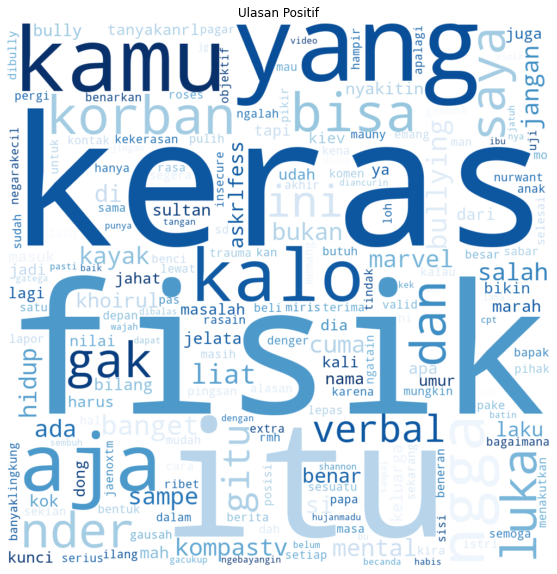

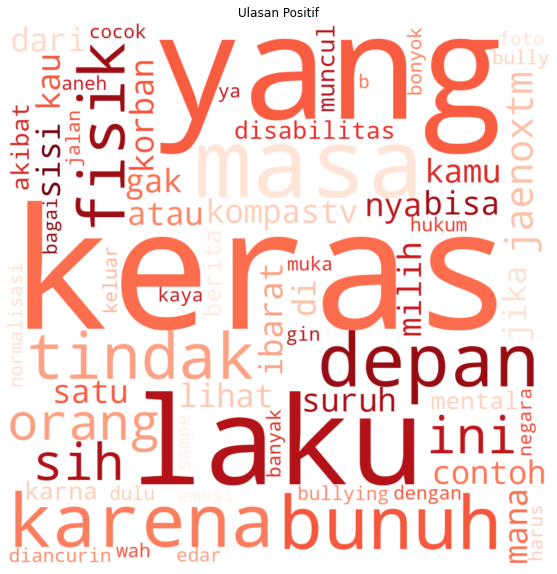

In [20]:
all_text_s1K = ' '.join(word for word in train_s1K["text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1K)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

all_text_s1P = ' '.join(word for word in train_s1P["text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1P)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
# print(data_label['labelPelaku'])
X_trainP, X_testP, y_trainP, y_testP = train_test_split(data_label['text'], data_label['labelPelaku'], 
                                                    test_size=0.1, stratify=data_label['labelPelaku'], random_state=30)

X_trainK, X_testK, y_trainK, y_testK = train_test_split(data_label['text'], data_label['labelKorban'], 
                                                    test_size=0.1, stratify=data_label['labelKorban'], random_state=30)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizerK = TfidfVectorizer(decode_error='replace', encoding='utf-8')
vectorizerP = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [23]:
X_trainP = vectorizerP.fit_transform(X_trainP)
X_testP = vectorizerP.transform(X_testP)

print(X_trainP.shape)
print(X_testP.shape)

X_trainK = vectorizerK.fit_transform(X_trainK)
X_testK = vectorizerK.transform(X_testK)

print(X_trainK.shape)
print(X_testK.shape)

(87, 901)
(10, 901)
(87, 900)
(10, 900)


In [24]:
X_trainP = X_trainP.toarray()
X_testP = X_testP.toarray()

X_trainK = X_trainK.toarray()
X_testK = X_testK.toarray()

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=2,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_trainP,y_trainP)
#mendapatkan hyperparameters terbaik
param1 = gscv_nb.best_params_


Fitting 6 folds for each of 100 candidates, totalling 600 fits


In [27]:
#deklarasi metode cross validation
cv_method2 = RepeatedStratifiedKFold(n_splits=2,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB2 = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb2 = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb2.fit(X_trainK,y_trainK)
#mendapatkan hyperparameters terbaik
param2 = gscv_nb2.best_params_

Fitting 6 folds for each of 100 candidates, totalling 600 fits


In [28]:
nbP = GaussianNB(var_smoothing = param1['var_smoothing'])
nbK = GaussianNB(var_smoothing = param2['var_smoothing'])

In [29]:
nbP.fit(X_trainP, y_trainP)
nbK.fit(X_trainK, y_trainK)

GaussianNB(var_smoothing=0.0012328467394420659)

In [30]:
y_pred_nbP = nbP.predict(X_testP)
y_pred_nbK = nbK.predict(X_testK)
print(y_pred_nbP)
print(y_pred_nbK)

[2 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2]


In [31]:
from sklearn.metrics import accuracy_score

print('--------------------- PELAKU  ----------------------------')
print('--------------------- Nilai Akurasi Model = ',accuracy_score(y_testP, y_pred_nbP))
print('--------------------- KORBAN  ----------------------------')
print('--------------------- Nilai Akurasi Model = ', accuracy_score(y_testK, y_pred_nbK))


--------------------- PELAKU  ----------------------------
--------------------- Nilai Akurasi Model =  0.1
--------------------- KORBAN  ----------------------------
--------------------- Nilai Akurasi Model =  0.9


In [32]:
import joblib

filenameK = 'korbanModel.sav'
joblib.dump(nbK, filenameK)
filenameP = 'pelakuModel.sav'
joblib.dump(nbP, filenameP)

['pelakuModel.sav']

In [33]:
filenameTP = 'pelakuTFIDF.sav'
joblib.dump(vectorizerP, filenameTP)
filenameTK = 'korbanTFIDF.sav'
joblib.dump(vectorizerK, filenameTK)


['korbanTFIDF.sav']

In [34]:
loaded_modelP = joblib.load(filenameP)
loaded_modelK = joblib.load(filenameK)
loaded_P = joblib.load(filenameTP)
loaded_K = joblib.load(filenameTK)

In [35]:
from ipywidgets import *
from IPython.display import display, clear_output
from IPython.html import widgets
from tensorflow.keras.preprocessing.sequence import pad_sequences



c:\Users\fgeli\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [36]:
text = widgets.Text(description="Input Kalimat", width=800)
textP = widgets.Text(description="Sentimen Pelaku = ", width=800)
textK = widgets.Text(description="Sentimen Korban = ", width=800)
display(text)

button = widgets.Button(description="Submit")
display(button)

def on_button_clicked(b):
    w = []
    tokenUnique = []
    #CASE FOLDING
    lower = text.value.lower()
    #STEMMING
    stem = stemmer.stem(lower)
    #TOKENIZING
    hapusAngka = re.sub(r"\d+", "", stem)
    hapusTandaBaca = hapusAngka.translate(str.maketrans("", "", string.punctuation))
    hapusSpasi = hapusTandaBaca.strip()
    for q in hapusSpasi.split():
        if q in awal:
            w.append(akhir[awal.index(q)])
        else:
            w.append(q)
    konten = (" ".join(map(str,w)))
    term_fitP = loaded_P.transform([konten]).toarray()
    term_fitK = loaded_K.transform([konten]).toarray()
    
    sentimenP = loaded_modelP.predict(term_fitP)
    sentimenK = loaded_modelK.predict(term_fitK)
    
    if(sentimenP == 1):
        sentimenP = "Positif"
    elif sentimenP == 0:
        sentimenP = "Negatif"
    else:
        sentimenP = "Netral"
        
    if(sentimenK == 1):
        sentimenK = "Positif"
    elif sentimenK == 0:
        sentimenK = "Negatif"
    else:
        sentimenK = "Netral"
                
    textP.value = sentimenP
    textK.value = sentimenK
    
    display(textP)
    display(textK)
    # textword = vectorizer.transform(konten)
    # print(textword)
    
button.on_click(on_button_clicked)    


Text(value='', description='Input Kalimat')

Button(description='Submit', style=ButtonStyle())